In [9]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import numpy as np
from scipy.spatial.transform import Rotation
from astropy import units as un
%matplotlib inline


print(f"21cmFAST version is {p21c.__version__}")
user_params = p21c.UserParams(
    HII_DIM=256, BOX_LEN=512,
    NON_CUBIC_FACTOR = 2,
)

lightcone = p21c.run_lightcone(
    redshift = 7.51,
    max_redshift = 11.93,
    # global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_backup',
    user_params=user_params,
    random_seed = 1,
)

21cmFAST version is 3.3.1


/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/storage/home/hcoda1/3/bxia34/.conda/envs/21cmFAST/lib/python3.9/site-packages/py21cmfast/_utils.py:815: User

(<Figure size 1200x600 with 2 Axes>,
 <Axes: xlabel='Line-of-Sight Distance [Mpc]', ylabel='y-axis [Mpc]'>)

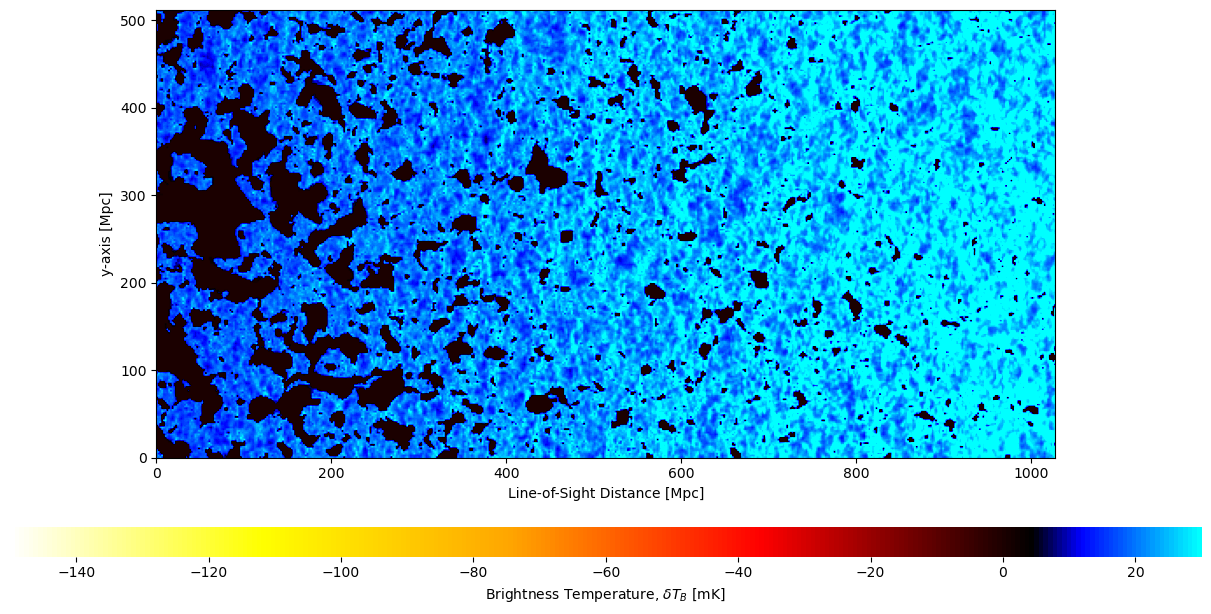

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
plotting.lightcone_sliceplot(lightcone, ax=ax, fig=fig, zticks='distance')

In [20]:
Tb = lightcone.brightness_temp
z = lightcone.lightcone_redshifts

In [32]:
z.shape[0]

514

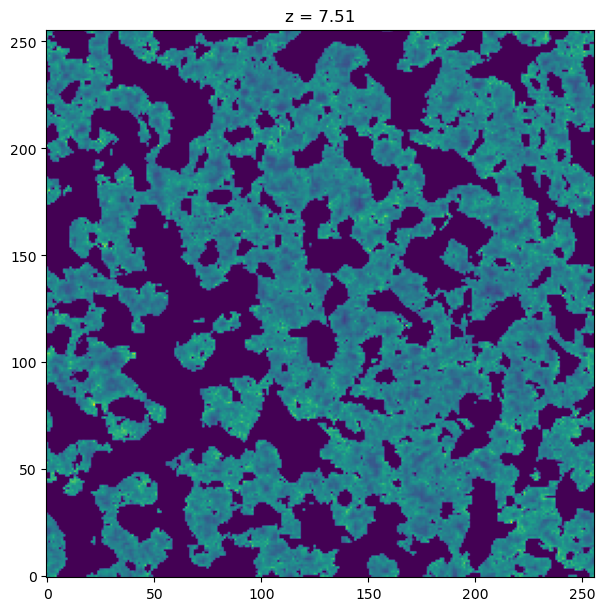

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
plt.title(f"z = {z[0]:.2f}")
plt.imshow(Tb[:,:,0], origin='lower')

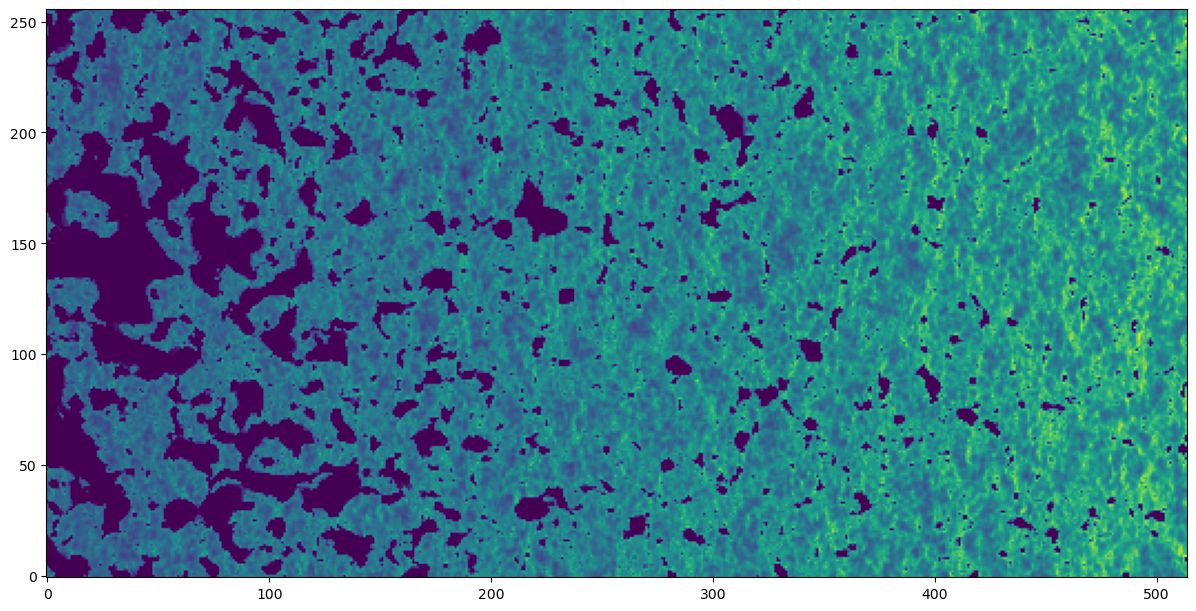

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
# plt.title(f"z = {z[0]:.2f}")
plt.imshow(Tb[0], origin='lower')

In [71]:
Tb = small[-1]

In [70]:
for i in range(Tb.shape[0]):
    fig, ax = plt.subplots(1, 1, figsize=(16,3), constrained_layout=True, dpi=200)
    # plt.title(f"z = {z[i]:.2f}")
    plt.imshow(Tb[i,:,:], origin='lower')
    plt.savefig(f"coeval{Tb.shape[0]-i-1:03d}.png")
    plt.close()
    # if i > 1:
    #     break

In [13]:
lightcone.brightness_temp.shape

(256, 256, 514)

In [14]:
lightcone.lightcone_distances[-1] - lightcone.lightcone_distances[0]

1028.0

In [15]:
lightcone.lightcone_distances.shape

(514,)

In [16]:
lightcone.shape

(256, 256, 514)

In [56]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

filename = '/storage/home/hcoda1/3/bxia34/scratch/LargeScale21cmData.h5'
with h5py.File(filename, 'r') as f:
    print(f.keys())
    brightness_temp = np.array(f['brightness_temp'])
    print("brightness_temp.shape =", brightness_temp.shape)
    print(f['kwargs'])
    kwargs = np.array(list(f['kwargs']))
    print("kwargs =")
    print(kwargs)
    print(f['params_seeds'])
    params_keys = list(f['params_seeds']['keys'])
    print("params.keys =", params_keys)
    params_values = np.array(list(f['params_seeds']['values']))
    seeds = params_values[:,-1]
    print("params.values =")
    print(params_values[:10,:])
    print(np.round(params_values[:10, -1]))
    large = brightness_temp
    large_values = params_values[:,:-1]

<KeysViewHDF5 ['brightness_temp', 'density', 'kwargs', 'params_seeds', 'redshifts_distances']>
brightness_temp.shape = (64, 256, 256, 514)
<HDF5 dataset "kwargs": shape (18, 2), type "|O">
kwargs =
[[b'p21c_run' b'lightcone']
 [b'num_images' b'32']
 [b'fields' b"['brightness_temp', 'density']"]
 [b'verbose' b'3']
 [b'seed' b'None']
 [b'save_direc_name'
  b'/storage/home/hcoda1/3/bxia34/scratch/LargeScale21cmData.h5']
 [b'strength' b'1']
 [b'redshift' b'[7.51, 11.93]']
 [b'HII_DIM' b'256']
 [b'BOX_LEN' b'512']
 [b'USE_INTERPOLATION_TABLES' b'True']
 [b'SIGMA_8' b'0.81']
 [b'hlittle' b'0.677']
 [b'OMm' b'0.31']
 [b'OMb' b'0.049']
 [b'POWER_INDEX' b'0.967']
 [b'NON_CUBIC_FACTOR' b'1']
 [b'cache_direc' b'/storage/home/hcoda1/3/bxia34/scratch/_cache/14']]
<HDF5 group "/params_seeds" (2 members)>
params.keys = [b'ION_Tvir_MIN', b'HII_EFF_FACTOR', b'seed']
params.values =
[[5.28299962e+00 5.44821628e+01 2.61212525e+09]
 [5.95378324e+00 1.68535290e+02 3.51905686e+09]
 [5.49573414e+00 2.1443795